In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Advertising_Sales.csv')
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.columns = ['TV','Radio','NP','Sales']
df.head()

,TV,Radio,NP,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isnull().sum()

TV       0
Radio    0
NP       0
Sales    0
dtype: int64

In [ ]:
df.dtypes

TV       float64
Radio    float64
NP       float64
Sales    float64
dtype: object

In [ ]:
df.duplicated().sum()

0

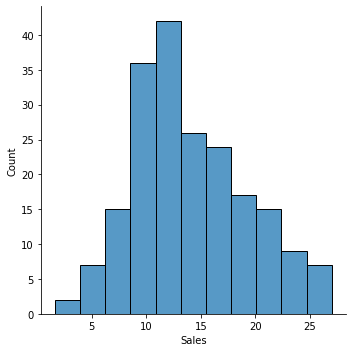

In [ ]:
sns.displot(df['Sales'],kind='hist')
plt.show()

In [ ]:
# sns.displot(np.exp(df['Sales']),kind='hist')
# plt.show()

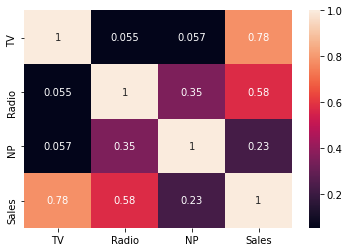

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

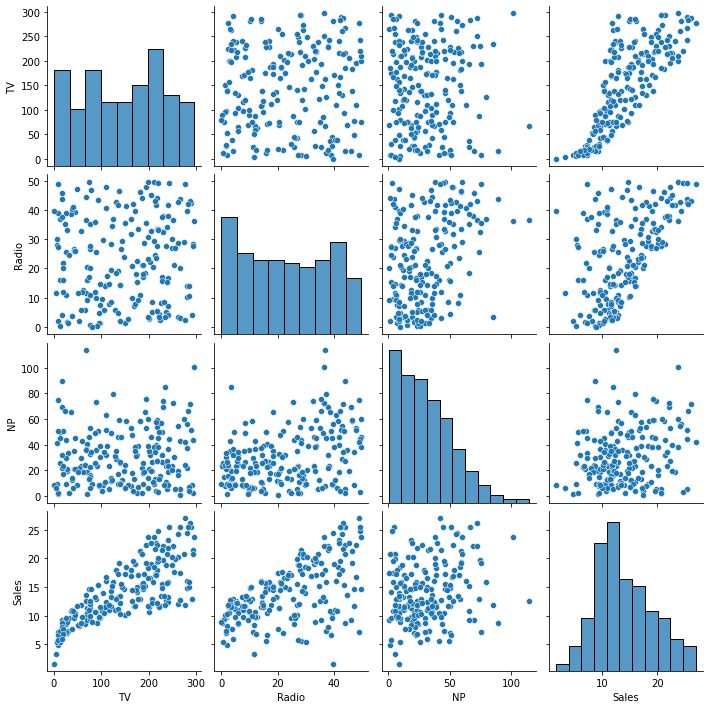

In [ ]:
sns.pairplot(data=df)
plt.show()

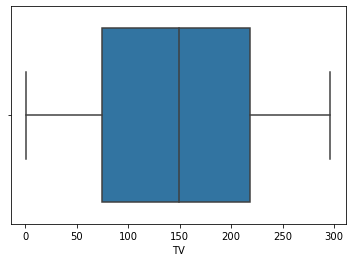

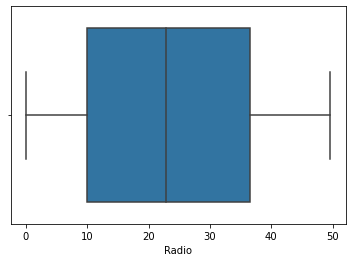

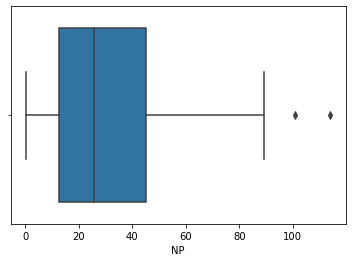

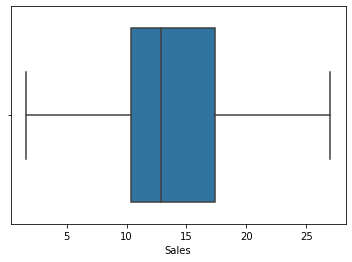

In [ ]:
for i in df.columns:
    sns.boxplot(x = df[i])
    plt.show()

In [ ]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,95%,97%,98%,99%,max
TV,200.0,147.0425,85.854236,0.7,5.387,7.790,13.195,149.75,280.735,286.048,289.720,292.907,296.4
Radio,200.0,23.2640,14.846809,0.0,0.399,1.290,1.995,22.90,46.810,48.900,49.000,49.400,49.6
NP,200.0,30.5540,21.778621,0.3,0.999,1.798,3.600,25.75,71.825,75.018,79.312,89.515,114.0
Sales,200.0,14.0225,5.217457,1.6,4.784,5.300,6.600,12.90,23.800,24.721,25.400,25.507,27.0


In [ ]:
def outlier_treatment(x):
    x = x.clip(lower=x.quantile(0.05))
    x = x.clip(upper=x.quantile(0.95))
    return x

In [ ]:
cols = list(df.columns)
cols

['TV', 'Radio', 'NP', 'Sales']

In [ ]:
df[cols] = df[cols].apply(outlier_treatment)

In [ ]:
x = df.drop('Sales',axis=1)
y = df['Sales']
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [ ]:
print(type(x_train),type(x_test))
print(type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
x_train.head()

,TV,Radio,NP
98,280.735,42.3,51.2
123,123.100,34.6,12.4
119,19.400,16.0,22.3
53,182.600,46.2,58.7
33,265.600,20.0,3.6


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
def evaluate(y, ypred):
    mae = mean_absolute_error(y, ypred)
    mse = mean_squared_error(y, ypred)
    rmse = np.sqrt(mean_squared_error(y, ypred))
    r_sqr = r2_score(y, ypred)
    return mae, mse,rmse, r_sqr

def train_test_scr(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [ ]:
model_tab = pd.DataFrame(columns=["Model", "MAE", "MSE",'RMSE',"R2 Score"])

### LinearReg

In [ ]:
m1 = LinearRegression()
m1.fit(x_train, y_train)
ypred_m1 = m1.predict(x_test)

In [ ]:
train_test_scr(m1)

Training Score 0.8998550527269576
Testing Score 0.918879798364617


In [ ]:
mae_lr, mse_lr,rmse_lr, r2_lr = evaluate(y_test, ypred_m1)
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

MAE: 1.0174957073079318
MSE: 1.7742623480923234
RMSE: 1.3320143948517686
R2 Score: 0.918879798364617


In [ ]:
new_row = {"Model": "LinearRegression","MAE": mae_lr, "MSE": mse_lr,
           "RMSE": rmse_lr,"R2 Score": r2_lr}
models = model_tab.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,1.017496,1.774262,1.332014,0.91888


In [ ]:
m1_coef = m1.coef_
m1_interc = m1.intercept_
print(m1_coef)
print(m1_interc)

[0.04418473 0.17602183 0.00110357]
3.3890507609095923


### Ridge Reg

In [ ]:
m2 = Ridge(alpha=7.8)
m2.fit(x_train, y_train)
ypred_m2 = m2.predict(x_test)

In [ ]:
train_test_scr(m2)

Training Score 0.8998550342645657
Testing Score 0.9188472836964413


In [ ]:
mae_rid, mse_rid,rmse_rid, r2_rid = evaluate(y_test, ypred_m2)
print("MAE:", mae_rid)
print("MSE:", mse_rid)
print("RMSE:", rmse_rid)
print("R2 Score:", r2_rid)

MAE: 1.0176859166599102
MSE: 1.7749735094348973
RMSE: 1.3322813176784014
R2 Score: 0.9188472836964413


In [ ]:
new_row1 = {"Model": "Ridge_Reg","MAE": mae_rid, "MSE": mse_rid,
           "RMSE": rmse_rid,"R2 Score": r2_rid}
models = models.append(new_row1, ignore_index=True)
models

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,1.017496,1.774262,1.332014,0.918880
1,Ridge_Reg,1.017686,1.774974,1.332281,0.918847


In [ ]:
m2_coef = m2.coef_
m2_interc = m2.intercept_
print(m2_coef)
print(m2_interc)

[0.04418458 0.17597196 0.00111894]
3.3897700141072615


### Lasso Reg

In [ ]:
m3 = Lasso(alpha=4.5)
m3.fit(x_train, y_train)
ypred_m3 = m3.predict(x_test)

In [ ]:
train_test_scr(m3)

Training Score 0.8960849938643677
Testing Score 0.9050762166069869


In [ ]:
mae_las, mse_las,rmse_las, r2_las = evaluate(y_test, ypred_m3)
print("MAE:", mae_las)
print("MSE:", mse_las)
print("RMSE:", rmse_las)
print("R2 Score:", r2_las)

MAE: 1.0786247645332248
MSE: 2.076174509152518
RMSE: 1.4408936494941318
R2 Score: 0.9050762166069869


In [ ]:
new_row2 = {"Model": "Lasso_Reg","MAE": mae_las, "MSE": mse_las,
           "RMSE": rmse_las,"R2 Score": r2_las}
models = models.append(new_row2, ignore_index=True)
models

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,1.017496,1.774262,1.332014,0.918880
1,Ridge_Reg,1.017686,1.774974,1.332281,0.918847
2,Lasso_Reg,1.078625,2.076175,1.440894,0.905076


In [ ]:
m3_coef = m3.coef_
m3_interc = m3.intercept_
print(m3_coef)
print(m3_interc)

[0.04373154 0.15651812 0.        ]
3.93636158071528


### ElasticNet Reg

In [ ]:
m4 = ElasticNet(alpha=8.2)
m4.fit(x_train, y_train)
ypred_m4 = m4.predict(x_test)

In [ ]:
train_test_scr(m4)

Training Score 0.8956955935322662
Testing Score 0.9040570703314266


In [ ]:
mae_en, mse_en,rmse_en, r2_en = evaluate(y_test, ypred_m4)
print("MAE:", mae_en)
print("MSE:", mse_en)
print("RMSE:", rmse_en)
print("R2 Score:", r2_en)

MAE: 1.0820455047253594
MSE: 2.098465292797914
RMSE: 1.448608053545856
R2 Score: 0.9040570703314266


In [ ]:
new_row3 = {"Model": "ElasticNet_Reg","MAE": mae_en, "MSE": mse_en,
           "RMSE": rmse_en,"R2 Score": r2_en}
models = models.append(new_row3, ignore_index=True)
models

,Model,MAE,MSE,RMSE,R2 Score
0,LinearRegression,1.017496,1.774262,1.332014,0.918880
1,Ridge_Reg,1.017686,1.774974,1.332281,0.918847
2,Lasso_Reg,1.078625,2.076175,1.440894,0.905076
3,ElasticNet_Reg,1.082046,2.098465,1.448608,0.904057


In [ ]:
m4_coef = m4.coef_
m4_interc = m4.intercept_
print(m4_coef)
print(m4_interc)

[0.04376915 0.15544166 0.        ]
3.955788404410603
